In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from os.path import join as ospj
from os.path import exists as osex
import glob
import torch

In [2]:
df_train_labels=pd.read_csv(r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels.csv', index_col=0)
df_train_labels[:3]

,ClipID,Boredom,Engagement,Confusion,Frustration,f_name,path
0,1100011002.avi,0,2,0,0,1100011002,C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...
1,1100011003.avi,0,2,0,0,1100011003,C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...
2,1100011004.avi,0,3,0,0,1100011004,C:\GitHub\Smart-Education-data\data\DAiSEE\Sor...


# Data Sampler
This takes samples from each video (300 frames) and make batches manually  
training data: 300 frames * 5482 videos


In [3]:
# #Number of frames checker

# for i, label_path in enumerate(df_train_labels.values):
#     _df=pd.read_csv(label_path[-1], index_col=0)
#     # assert len(_df.index)==300
#     if i%100==0:
#         print(i, end=' ')
#     if len(_df.index)!=300:
#         print('length:', len(_df.index))
#         print('at: ',label_path)

In [4]:
class Custom_DataLoader:
    def __init__():
        pass
    def __get_item__():
        pass
    def __len__():
        pass

In [5]:
next(iter(df_train_labels.values))

array(['1100011002.avi', 0, 2, 0, 0, 1100011002,
       'C:\\GitHub\\Smart-Education-data\\data\\DAiSEE\\Sorted\\OpenFace\\1100011002.csv'],
      dtype=object)

In [6]:
#put seed here
seed=0
#select seed mode here
SEED_BY_DATA=False
SEED_ONCE=True
#choose amount of samples
n=10
batch_size=500
assert batch_size%n==0

print(df_train_labels.columns)

label_iter=iter(df_train_labels.values)

np.random.seed(seed)
len_data=n*len(df_train_labels.index)
print(len_data)

# train_loder=Custom_DataLoader()
train_loader=[]

def build_sample(n, label_iter):
    labels=next(label_iter)
    df_sample=pd.read_csv(labels[-1], index_col=0).sample(n=n, frac=None, random_state=None) #use global seed
    df_sample['Boredom']=labels[1] #add Boredom column
    df_sample['Engagement']=labels[2] #add Engagement column
    df_sample['Confusion']=labels[3] #add Confusion column
    df_sample['Frustration']=labels[4] #add Frustration column
    return df_sample

for batch in range(len_data//batch_size+1):
    idx_start=batch*batch_size
    idx_end=(batch+1)*batch_size if (batch+1)*batch_size<len_data else len_data
    print(batch, idx_start, idx_end)
    idx_curr=idx_start
    
    #init before while operation
    labels=next(label_iter)
    # df_sample=pd.read_csv(labels[-1], index_col=0).sample(n=n, frac=None, random_state=None) #use global seed
    df_sample=build_sample(n, label_iter)
    sample=torch.Tensor(df_sample.values)
    # print(sample.shape)
    idx_curr+=n
    while idx_end-idx_curr>=n:
        try: #read n samples
            df_sample=build_sample(n, label_iter)
            # labels=next(label_iter)
            # df_sample=pd.read_csv(labels[-1], index_col=0).sample(n=n, frac=None, random_state=None) #use global seed
            # df_sample['Boredom']=labels[1] #add Boredom column
            # df_sample['Engagement']=labels[2] #add Engagement column
            # df_sample['Confusion']=labels[3] #add Confusion column
            # df_sample['Frustration']=labels[4] #add Frustration column
            sample=torch.vstack((sample, torch.Tensor(df_sample.values)))
            # print(sample.shape)
            idx_curr+=n
        except:
            pass
    # print(sample.shape)
    train_loader.append(sample)

In [ ]:
train_loader[0]

tensor([[0.0000, 6.9330, 0.9800,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 6.2670, 0.9800,  ..., 0.0000, 0.0000, 1.0000],
        [0.0000, 0.4000, 0.9800,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 4.5330, 0.9800,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 7.4670, 0.9800,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6670, 0.9800,  ..., 0.0000, 0.0000, 0.0000]])

In [ ]:
#put seed here
seed=0
#select seed mode here
SEED_BY_DATA=False
SEED_ONCE=True
#choose amount of samples
n=1
frac=None

print(df_train_labels.columns)
np.random.seed(seed)
for i, label_path in enumerate(df_train_labels.values):
    _df=pd.read_csv(label_path[-1], index_col=0)
    _df['Boredom']=label_path[1] #add Boredom column
    _df['Engagement']=label_path[2] #add Engagement column
    _df['Confusion']=label_path[3] #add Confusion column
    _df['Frustration']=label_path[4] #add Frustration column
    if SEED_BY_DATA:
        _sample=_df.sample(n, frac, random_state=seed)
    elif SEED_ONCE:
        _sample=_df.sample(n, frac, random_state=None)
    # print(_sample)
    if i%100==0:
        print(i, end=' ')

'''
Index(['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ',
       'f_name', 'path'],
      dtype='object')
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 
1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 
4600 4700 4800 4900 5000 5100 5200 5300 5400 
''' #7m 30.2s
pass

Index(['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ',
       'f_name', 'path'],
      dtype='object')
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 

In [1]:
#put seed here
seed=0
#select seed mode here
SEED_BY_DATA=False
SEED_ONCE=True
#choose amount of samples
n=10
frac=None

print(df_train_labels.columns)
np.random.seed(seed)
for i, label_path in enumerate(df_train_labels.values):
    _df=pd.read_csv(label_path[-1], index_col=0)
    _df['Boredom']=label_path[1] #add Boredom column
    _df['Engagement']=label_path[2] #add Engagement column
    _df['Confusion']=label_path[3] #add Confusion column
    _df['Frustration']=label_path[4] #add Frustration column
    if SEED_BY_DATA:
        _sample=_df.sample(n, frac, random_state=seed)
    elif SEED_ONCE:
        _sample=_df.sample(n, frac, random_state=None)
    # print(_sample)
    if i%100==0:
        print(i, end=' ')

NameError: name 'df_train_labels' is not defined

building column names in dataloader...

In [ ]:
columns=['frame',
                  'face_id',
                  'timestamp',
                  'confidence',
                  'success',
                  'gaze_0_x', 'gaze_0_y', 'gaze_0_z',
                  'gaze_1_x', 'gaze_1_y', 'gaze_1_z',
                  'gaze_angle_x', 'gaze_angle_y', 
                  'eye_lmk_x_0', 'eye_lmk_x_1', 'eye_lmk_x_2', 'eye_lmk_x_3', 'eye_lmk_x_4',
                  'eye_lmk_x_5', 'eye_lmk_x_6', 'eye_lmk_x_7', 'eye_lmk_x_8', 'eye_lmk_x_9',
                  'eye_lmk_x_10', 'eye_lmk_x_11', 'eye_lmk_x_12', 'eye_lmk_x_13', 'eye_lmk_x_14',
                  'eye_lmk_x_15', 'eye_lmk_x_16', 'eye_lmk_x_17', 'eye_lmk_x_18', 'eye_lmk_x_19',
                  'eye_lmk_x_20', 'eye_lmk_x_21', 'eye_lmk_x_22', 'eye_lmk_x_23', 'eye_lmk_x_24',
                  'eye_lmk_x_25', 'eye_lmk_x_26', 'eye_lmk_x_27', 'eye_lmk_x_28', 'eye_lmk_x_29',
                  'eye_lmk_x_30', 'eye_lmk_x_31', 'eye_lmk_x_32', 'eye_lmk_x_33', 'eye_lmk_x_34',
                  'eye_lmk_x_35', 'eye_lmk_x_36', 'eye_lmk_x_37', 'eye_lmk_x_38', 'eye_lmk_x_39',
                  'eye_lmk_x_40', 'eye_lmk_x_41', 'eye_lmk_x_42', 'eye_lmk_x_43', 'eye_lmk_x_44',
                  'eye_lmk_x_45', 'eye_lmk_x_46', 'eye_lmk_x_47', 'eye_lmk_x_48', 'eye_lmk_x_49',
                  'eye_lmk_x_50', 'eye_lmk_x_51', 'eye_lmk_x_52', 'eye_lmk_x_53', 'eye_lmk_x_54',
                  'eye_lmk_x_55',
                  'eye_lmk_y_0', 'eye_lmk_y_1', 'eye_lmk_y_2', 'eye_lmk_y_3', 'eye_lmk_y_4',
                  'eye_lmk_y_5', 'eye_lmk_y_6', 'eye_lmk_y_7', 'eye_lmk_y_8', 'eye_lmk_y_9',
                  'eye_lmk_y_10', 'eye_lmk_y_11', 'eye_lmk_y_12', 'eye_lmk_y_13', 'eye_lmk_y_14',
                  'eye_lmk_y_15', 'eye_lmk_y_16', 'eye_lmk_y_17', 'eye_lmk_y_18', 'eye_lmk_y_19',
                  'eye_lmk_y_20', 'eye_lmk_y_21', 'eye_lmk_y_22', 'eye_lmk_y_23', 'eye_lmk_y_24',
                  'eye_lmk_y_25', 'eye_lmk_y_26', 'eye_lmk_y_27', 'eye_lmk_y_28', 'eye_lmk_y_29',
                  'eye_lmk_y_30', 'eye_lmk_y_31', 'eye_lmk_y_32', 'eye_lmk_y_33', 'eye_lmk_y_34',
                  'eye_lmk_y_35', 'eye_lmk_y_36', 'eye_lmk_y_37', 'eye_lmk_y_38', 'eye_lmk_y_39',
                  'eye_lmk_y_40', 'eye_lmk_y_41', 'eye_lmk_y_42', 'eye_lmk_y_43', 'eye_lmk_y_44',
                  'eye_lmk_y_45', 'eye_lmk_y_46', 'eye_lmk_y_47', 'eye_lmk_y_48', 'eye_lmk_y_49',
                  'eye_lmk_y_50', 'eye_lmk_y_51', 'eye_lmk_y_52', 'eye_lmk_y_53', 'eye_lmk_y_54',
                  'eye_lmk_y_55',
                  'eye_lmk_X_0', 'eye_lmk_X_1', 'eye_lmk_X_2', 'eye_lmk_X_3', 'eye_lmk_X_4', 
                  'eye_lmk_X_5', 'eye_lmk_X_6', 'eye_lmk_X_7', 'eye_lmk_X_8', 'eye_lmk_X_9',
                  'eye_lmk_X_10', 'eye_lmk_X_11', 'eye_lmk_X_12', 'eye_lmk_X_13', 'eye_lmk_X_14',
                  'eye_lmk_X_15', 'eye_lmk_X_16', 'eye_lmk_X_17', 'eye_lmk_X_18', 'eye_lmk_X_19',
                  'eye_lmk_X_20', 'eye_lmk_X_21', 'eye_lmk_X_22', 'eye_lmk_X_23', 'eye_lmk_X_24',
                  'eye_lmk_X_25', 'eye_lmk_X_26', 'eye_lmk_X_27', 'eye_lmk_X_28', 'eye_lmk_X_29',
                  'eye_lmk_X_30', 'eye_lmk_X_31', 'eye_lmk_X_32', 'eye_lmk_X_33', 'eye_lmk_X_34',
                  'eye_lmk_X_35', 'eye_lmk_X_36', 'eye_lmk_X_37', 'eye_lmk_X_38', 'eye_lmk_X_39',
                  'eye_lmk_X_40', 'eye_lmk_X_41', 'eye_lmk_X_42', 'eye_lmk_X_43', 'eye_lmk_X_44',
                  'eye_lmk_X_45', 'eye_lmk_X_46', 'eye_lmk_X_47', 'eye_lmk_X_48', 'eye_lmk_X_49',
                  'eye_lmk_X_50', 'eye_lmk_X_51', 'eye_lmk_X_52', 'eye_lmk_X_53', 'eye_lmk_X_54', 
                  'eye_lmk_X_55', 
                  'eye_lmk_Y_0', 'eye_lmk_Y_1', 'eye_lmk_Y_2', 'eye_lmk_Y_3', 'eye_lmk_Y_4',
                  'eye_lmk_Y_5', 'eye_lmk_Y_6', 'eye_lmk_Y_7', 'eye_lmk_Y_8', 'eye_lmk_Y_9',
                  'eye_lmk_Y_10', 'eye_lmk_Y_11', 'eye_lmk_Y_12', 'eye_lmk_Y_13', 'eye_lmk_Y_14',
                  'eye_lmk_Y_15', 'eye_lmk_Y_16', 'eye_lmk_Y_17', 'eye_lmk_Y_18', 'eye_lmk_Y_19',
                  'eye_lmk_Y_20', 'eye_lmk_Y_21', 'eye_lmk_Y_22', 'eye_lmk_Y_23', 'eye_lmk_Y_24',
                  'eye_lmk_Y_25', 'eye_lmk_Y_26', 'eye_lmk_Y_27', 'eye_lmk_Y_28', 'eye_lmk_Y_29',
                  'eye_lmk_Y_30', 'eye_lmk_Y_31', 'eye_lmk_Y_32', 'eye_lmk_Y_33', 'eye_lmk_Y_34',
                  'eye_lmk_Y_35', 'eye_lmk_Y_36', 'eye_lmk_Y_37', 'eye_lmk_Y_38', 'eye_lmk_Y_39',
                  'eye_lmk_Y_40', 'eye_lmk_Y_41', 'eye_lmk_Y_42', 'eye_lmk_Y_43', 'eye_lmk_Y_44',
                  'eye_lmk_Y_45', 'eye_lmk_Y_46', 'eye_lmk_Y_47', 'eye_lmk_Y_48', 'eye_lmk_Y_49',
                  'eye_lmk_Y_50', 'eye_lmk_Y_51', 'eye_lmk_Y_52', 'eye_lmk_Y_53', 'eye_lmk_Y_54',
                  'eye_lmk_Y_55', 
                  'eye_lmk_Z_0', 'eye_lmk_Z_1', 'eye_lmk_Z_2', 'eye_lmk_Z_3', 'eye_lmk_Z_4',
                  'eye_lmk_Z_5', 'eye_lmk_Z_6', 'eye_lmk_Z_7', 'eye_lmk_Z_8', 'eye_lmk_Z_9', 
                  'eye_lmk_Z_10', 'eye_lmk_Z_11', 'eye_lmk_Z_12', 'eye_lmk_Z_13', 'eye_lmk_Z_14', 
                  'eye_lmk_Z_15', 'eye_lmk_Z_16', 'eye_lmk_Z_17', 'eye_lmk_Z_18', 'eye_lmk_Z_19',
                  'eye_lmk_Z_20', 'eye_lmk_Z_21', 'eye_lmk_Z_22', 'eye_lmk_Z_23', 'eye_lmk_Z_24', 
                  'eye_lmk_Z_25', 'eye_lmk_Z_26', 'eye_lmk_Z_27', 'eye_lmk_Z_28', 'eye_lmk_Z_29',
                  'eye_lmk_Z_30', 'eye_lmk_Z_31', 'eye_lmk_Z_32', 'eye_lmk_Z_33', 'eye_lmk_Z_34', 
                  'eye_lmk_Z_35', 'eye_lmk_Z_36', 'eye_lmk_Z_37', 'eye_lmk_Z_38', 'eye_lmk_Z_39',
                  'eye_lmk_Z_40', 'eye_lmk_Z_41', 'eye_lmk_Z_42', 'eye_lmk_Z_43', 'eye_lmk_Z_44', 
                  'eye_lmk_Z_45', 'eye_lmk_Z_46', 'eye_lmk_Z_47', 'eye_lmk_Z_48', 'eye_lmk_Z_49', 
                  'eye_lmk_Z_50', 'eye_lmk_Z_51', 'eye_lmk_Z_52', 'eye_lmk_Z_53', 'eye_lmk_Z_54', 
                  'eye_lmk_Z_55', 
                  'pose_Tx', 'pose_Ty', 'pose_Tz', 'pose_Rx', 'pose_Ry', 'pose_Rz',
                  'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 
                  'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19',
                  'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29',
                  'x_30', 'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 
                  'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49',
                  'x_50', 'x_51', 'x_52', 'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59',
                  'x_60', 'x_61', 'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67',
                  'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9',
                  'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 
                  'y_20', 'y_21', 'y_22', 'y_23', 'y_24', 'y_25', 'y_26', 'y_27', 'y_28', 'y_29',
                  'y_30', 'y_31', 'y_32', 'y_33', 'y_34', 'y_35', 'y_36', 'y_37', 'y_38', 'y_39',
                  'y_40', 'y_41', 'y_42', 'y_43', 'y_44', 'y_45', 'y_46', 'y_47', 'y_48', 'y_49', 
                  'y_50', 'y_51', 'y_52', 'y_53', 'y_54', 'y_55', 'y_56', 'y_57', 'y_58', 'y_59', 
                  'y_60', 'y_61', 'y_62', 'y_63', 'y_64', 'y_65', 'y_66', 'y_67', 
                  'X_0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 
                  'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 
                  'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 
                  'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 
                  'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 
                  'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 
                  'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 
                  'Y_0', 'Y_1', 'Y_2', 'Y_3', 'Y_4', 'Y_5', 'Y_6', 'Y_7', 'Y_8', 'Y_9',
                  'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14', 'Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19',
                  'Y_20', 'Y_21', 'Y_22', 'Y_23', 'Y_24', 'Y_25', 'Y_26', 'Y_27', 'Y_28', 'Y_29', 
                  'Y_30', 'Y_31', 'Y_32', 'Y_33', 'Y_34', 'Y_35', 'Y_36', 'Y_37', 'Y_38', 'Y_39', 
                  'Y_40', 'Y_41', 'Y_42', 'Y_43', 'Y_44', 'Y_45', 'Y_46', 'Y_47', 'Y_48', 'Y_49', 
                  'Y_50', 'Y_51', 'Y_52', 'Y_53', 'Y_54', 'Y_55', 'Y_56', 'Y_57', 'Y_58', 'Y_59', 
                  'Y_60', 'Y_61', 'Y_62', 'Y_63', 'Y_64', 'Y_65', 'Y_66', 'Y_67',
                  'Z_0', 'Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6', 'Z_7', 'Z_8', 'Z_9',
                  'Z_10', 'Z_11', 'Z_12', 'Z_13', 'Z_14', 'Z_15', 'Z_16', 'Z_17', 'Z_18', 'Z_19',
                  'Z_20', 'Z_21', 'Z_22', 'Z_23', 'Z_24', 'Z_25', 'Z_26', 'Z_27', 'Z_28', 'Z_29',
                  'Z_30', 'Z_31', 'Z_32', 'Z_33', 'Z_34', 'Z_35', 'Z_36', 'Z_37', 'Z_38', 'Z_39',
                  'Z_40', 'Z_41', 'Z_42', 'Z_43', 'Z_44', 'Z_45', 'Z_46', 'Z_47', 'Z_48', 'Z_49',
                  'Z_50', 'Z_51', 'Z_52', 'Z_53', 'Z_54', 'Z_55', 'Z_56', 'Z_57', 'Z_58', 'Z_59',
                  'Z_60', 'Z_61', 'Z_62', 'Z_63', 'Z_64', 'Z_65', 'Z_66', 'Z_67',
                  'p_scale', 'p_rx', 'p_ry', 'p_rz', 'p_tx', 'p_ty', 
                  'p_0', 'p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'p_9', 
                  'p_10', 'p_11', 'p_12', 'p_13', 'p_14', 'p_15', 'p_16', 'p_17', 'p_18', 'p_19',
                  'p_20', 'p_21', 'p_22', 'p_23', 'p_24', 'p_25', 'p_26', 'p_27', 'p_28', 'p_29', 
                  'p_30', 'p_31', 'p_32', 'p_33', 
                  'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 
                  'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 
                  'AU45_r', 
                  'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 
                  'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 
                  'AU28_c', 'AU45_c'
                  ]

In [ ]:
len(columns)

714

In [ ]:
col='frame, face_id, timestamp, confidence, success, gaze_0_x, gaze_0_y, gaze_0_z, gaze_1_x, gaze_1_y, gaze_1_z, gaze_angle_x, gaze_angle_y, eye_lmk_x_0, eye_lmk_x_1, eye_lmk_x_2, eye_lmk_x_3, eye_lmk_x_4, eye_lmk_x_5, eye_lmk_x_6, eye_lmk_x_7, eye_lmk_x_8, eye_lmk_x_9, eye_lmk_x_10, eye_lmk_x_11, eye_lmk_x_12, eye_lmk_x_13, eye_lmk_x_14, eye_lmk_x_15, eye_lmk_x_16, eye_lmk_x_17, eye_lmk_x_18, eye_lmk_x_19, eye_lmk_x_20, eye_lmk_x_21, eye_lmk_x_22, eye_lmk_x_23, eye_lmk_x_24, eye_lmk_x_25, eye_lmk_x_26, eye_lmk_x_27, eye_lmk_x_28, eye_lmk_x_29, eye_lmk_x_30, eye_lmk_x_31, eye_lmk_x_32, eye_lmk_x_33, eye_lmk_x_34, eye_lmk_x_35, eye_lmk_x_36, eye_lmk_x_37, eye_lmk_x_38, eye_lmk_x_39, eye_lmk_x_40, eye_lmk_x_41, eye_lmk_x_42, eye_lmk_x_43, eye_lmk_x_44, eye_lmk_x_45, eye_lmk_x_46, eye_lmk_x_47, eye_lmk_x_48, eye_lmk_x_49, eye_lmk_x_50, eye_lmk_x_51, eye_lmk_x_52, eye_lmk_x_53, eye_lmk_x_54, eye_lmk_x_55, eye_lmk_y_0, eye_lmk_y_1, eye_lmk_y_2, eye_lmk_y_3, eye_lmk_y_4, eye_lmk_y_5, eye_lmk_y_6, eye_lmk_y_7, eye_lmk_y_8, eye_lmk_y_9, eye_lmk_y_10, eye_lmk_y_11, eye_lmk_y_12, eye_lmk_y_13, eye_lmk_y_14, eye_lmk_y_15, eye_lmk_y_16, eye_lmk_y_17, eye_lmk_y_18, eye_lmk_y_19, eye_lmk_y_20, eye_lmk_y_21, eye_lmk_y_22, eye_lmk_y_23, eye_lmk_y_24, eye_lmk_y_25, eye_lmk_y_26, eye_lmk_y_27, eye_lmk_y_28, eye_lmk_y_29, eye_lmk_y_30, eye_lmk_y_31, eye_lmk_y_32, eye_lmk_y_33, eye_lmk_y_34, eye_lmk_y_35, eye_lmk_y_36, eye_lmk_y_37, eye_lmk_y_38, eye_lmk_y_39, eye_lmk_y_40, eye_lmk_y_41, eye_lmk_y_42, eye_lmk_y_43, eye_lmk_y_44, eye_lmk_y_45, eye_lmk_y_46, eye_lmk_y_47, eye_lmk_y_48, eye_lmk_y_49, eye_lmk_y_50, eye_lmk_y_51, eye_lmk_y_52, eye_lmk_y_53, eye_lmk_y_54, eye_lmk_y_55, eye_lmk_X_0, eye_lmk_X_1, eye_lmk_X_2, eye_lmk_X_3, eye_lmk_X_4, eye_lmk_X_5, eye_lmk_X_6, eye_lmk_X_7, eye_lmk_X_8, eye_lmk_X_9, eye_lmk_X_10, eye_lmk_X_11, eye_lmk_X_12, eye_lmk_X_13, eye_lmk_X_14, eye_lmk_X_15, eye_lmk_X_16, eye_lmk_X_17, eye_lmk_X_18, eye_lmk_X_19, eye_lmk_X_20, eye_lmk_X_21, eye_lmk_X_22, eye_lmk_X_23, eye_lmk_X_24, eye_lmk_X_25, eye_lmk_X_26, eye_lmk_X_27, eye_lmk_X_28, eye_lmk_X_29, eye_lmk_X_30, eye_lmk_X_31, eye_lmk_X_32, eye_lmk_X_33, eye_lmk_X_34, eye_lmk_X_35, eye_lmk_X_36, eye_lmk_X_37, eye_lmk_X_38, eye_lmk_X_39, eye_lmk_X_40, eye_lmk_X_41, eye_lmk_X_42, eye_lmk_X_43, eye_lmk_X_44, eye_lmk_X_45, eye_lmk_X_46, eye_lmk_X_47, eye_lmk_X_48, eye_lmk_X_49, eye_lmk_X_50, eye_lmk_X_51, eye_lmk_X_52, eye_lmk_X_53, eye_lmk_X_54, eye_lmk_X_55, eye_lmk_Y_0, eye_lmk_Y_1, eye_lmk_Y_2, eye_lmk_Y_3, eye_lmk_Y_4, eye_lmk_Y_5, eye_lmk_Y_6, eye_lmk_Y_7, eye_lmk_Y_8, eye_lmk_Y_9, eye_lmk_Y_10, eye_lmk_Y_11, eye_lmk_Y_12, eye_lmk_Y_13, eye_lmk_Y_14, eye_lmk_Y_15, eye_lmk_Y_16, eye_lmk_Y_17, eye_lmk_Y_18, eye_lmk_Y_19, eye_lmk_Y_20, eye_lmk_Y_21, eye_lmk_Y_22, eye_lmk_Y_23, eye_lmk_Y_24, eye_lmk_Y_25, eye_lmk_Y_26, eye_lmk_Y_27, eye_lmk_Y_28, eye_lmk_Y_29, eye_lmk_Y_30, eye_lmk_Y_31, eye_lmk_Y_32, eye_lmk_Y_33, eye_lmk_Y_34, eye_lmk_Y_35, eye_lmk_Y_36, eye_lmk_Y_37, eye_lmk_Y_38, eye_lmk_Y_39, eye_lmk_Y_40, eye_lmk_Y_41, eye_lmk_Y_42, eye_lmk_Y_43, eye_lmk_Y_44, eye_lmk_Y_45, eye_lmk_Y_46, eye_lmk_Y_47, eye_lmk_Y_48, eye_lmk_Y_49, eye_lmk_Y_50, eye_lmk_Y_51, eye_lmk_Y_52, eye_lmk_Y_53, eye_lmk_Y_54, eye_lmk_Y_55, eye_lmk_Z_0, eye_lmk_Z_1, eye_lmk_Z_2, eye_lmk_Z_3, eye_lmk_Z_4, eye_lmk_Z_5, eye_lmk_Z_6, eye_lmk_Z_7, eye_lmk_Z_8, eye_lmk_Z_9, eye_lmk_Z_10, eye_lmk_Z_11, eye_lmk_Z_12, eye_lmk_Z_13, eye_lmk_Z_14, eye_lmk_Z_15, eye_lmk_Z_16, eye_lmk_Z_17, eye_lmk_Z_18, eye_lmk_Z_19, eye_lmk_Z_20, eye_lmk_Z_21, eye_lmk_Z_22, eye_lmk_Z_23, eye_lmk_Z_24, eye_lmk_Z_25, eye_lmk_Z_26, eye_lmk_Z_27, eye_lmk_Z_28, eye_lmk_Z_29, eye_lmk_Z_30, eye_lmk_Z_31, eye_lmk_Z_32, eye_lmk_Z_33, eye_lmk_Z_34, eye_lmk_Z_35, eye_lmk_Z_36, eye_lmk_Z_37, eye_lmk_Z_38, eye_lmk_Z_39, eye_lmk_Z_40, eye_lmk_Z_41, eye_lmk_Z_42, eye_lmk_Z_43, eye_lmk_Z_44, eye_lmk_Z_45, eye_lmk_Z_46, eye_lmk_Z_47, eye_lmk_Z_48, eye_lmk_Z_49, eye_lmk_Z_50, eye_lmk_Z_51, eye_lmk_Z_52, eye_lmk_Z_53, eye_lmk_Z_54, eye_lmk_Z_55, pose_Tx, pose_Ty, pose_Tz, pose_Rx, pose_Ry, pose_Rz, x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18, x_19, x_20, x_21, x_22, x_23, x_24, x_25, x_26, x_27, x_28, x_29, x_30, x_31, x_32, x_33, x_34, x_35, x_36, x_37, x_38, x_39, x_40, x_41, x_42, x_43, x_44, x_45, x_46, x_47, x_48, x_49, x_50, x_51, x_52, x_53, x_54, x_55, x_56, x_57, x_58, x_59, x_60, x_61, x_62, x_63, x_64, x_65, x_66, x_67, y_0, y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10, y_11, y_12, y_13, y_14, y_15, y_16, y_17, y_18, y_19, y_20, y_21, y_22, y_23, y_24, y_25, y_26, y_27, y_28, y_29, y_30, y_31, y_32, y_33, y_34, y_35, y_36, y_37, y_38, y_39, y_40, y_41, y_42, y_43, y_44, y_45, y_46, y_47, y_48, y_49, y_50, y_51, y_52, y_53, y_54, y_55, y_56, y_57, y_58, y_59, y_60, y_61, y_62, y_63, y_64, y_65, y_66, y_67, X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11, X_12, X_13, X_14, X_15, X_16, X_17, X_18, X_19, X_20, X_21, X_22, X_23, X_24, X_25, X_26, X_27, X_28, X_29, X_30, X_31, X_32, X_33, X_34, X_35, X_36, X_37, X_38, X_39, X_40, X_41, X_42, X_43, X_44, X_45, X_46, X_47, X_48, X_49, X_50, X_51, X_52, X_53, X_54, X_55, X_56, X_57, X_58, X_59, X_60, X_61, X_62, X_63, X_64, X_65, X_66, X_67, Y_0, Y_1, Y_2, Y_3, Y_4, Y_5, Y_6, Y_7, Y_8, Y_9, Y_10, Y_11, Y_12, Y_13, Y_14, Y_15, Y_16, Y_17, Y_18, Y_19, Y_20, Y_21, Y_22, Y_23, Y_24, Y_25, Y_26, Y_27, Y_28, Y_29, Y_30, Y_31, Y_32, Y_33, Y_34, Y_35, Y_36, Y_37, Y_38, Y_39, Y_40, Y_41, Y_42, Y_43, Y_44, Y_45, Y_46, Y_47, Y_48, Y_49, Y_50, Y_51, Y_52, Y_53, Y_54, Y_55, Y_56, Y_57, Y_58, Y_59, Y_60, Y_61, Y_62, Y_63, Y_64, Y_65, Y_66, Y_67, Z_0, Z_1, Z_2, Z_3, Z_4, Z_5, Z_6, Z_7, Z_8, Z_9, Z_10, Z_11, Z_12, Z_13, Z_14, Z_15, Z_16, Z_17, Z_18, Z_19, Z_20, Z_21, Z_22, Z_23, Z_24, Z_25, Z_26, Z_27, Z_28, Z_29, Z_30, Z_31, Z_32, Z_33, Z_34, Z_35, Z_36, Z_37, Z_38, Z_39, Z_40, Z_41, Z_42, Z_43, Z_44, Z_45, Z_46, Z_47, Z_48, Z_49, Z_50, Z_51, Z_52, Z_53, Z_54, Z_55, Z_56, Z_57, Z_58, Z_59, Z_60, Z_61, Z_62, Z_63, Z_64, Z_65, Z_66, Z_67, p_scale, p_rx, p_ry, p_rz, p_tx, p_ty, p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14, p_15, p_16, p_17, p_18, p_19, p_20, p_21, p_22, p_23, p_24, p_25, p_26, p_27, p_28, p_29, p_30, p_31, p_32, p_33, AU01_r, AU02_r, AU04_r, AU05_r, AU06_r, AU07_r, AU09_r, AU10_r, AU12_r, AU14_r, AU15_r, AU17_r, AU20_r, AU23_r, AU25_r, AU26_r, AU45_r, AU01_c, AU02_c, AU04_c, AU05_c, AU06_c, AU07_c, AU09_c, AU10_c, AU12_c, AU14_c, AU15_c, AU17_c, AU20_c, AU23_c, AU25_c, AU26_c, AU28_c, AU45_c'.split(', ')

In [ ]:
#veryfying...
n=10
for i in range(len(col)):
    if col[i]!=columns[i]:
        print(i, col[i], columns[i])

# datalodaer.py, model.py test

In [1]:
import pandas as pd
import numpy as np
from dataloader import Path_labels, OpenFace_DataLoader
from model import MLP

In [2]:
train_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels.csv", index_col=0)[:10])

In [3]:
trainloader=OpenFace_DataLoader(n=10,
                                path_labels=train_path_labels,
                                batch_size=500,
                                feature_set=None,
                                y_col=['Engagement'],
                                seed=0)

c:\GitHub\Smart-Education\EngaementModel\dataloader.py:198: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sample=pd.read_csv(labels[-1], sep='[,][ ]+').sample(n=n, frac=None, random_state=None) #use global seed
c:\GitHub\Smart-Education\EngaementModel\dataloader.py:198: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sample=pd.read_csv(labels[-1], sep='[,][ ]+').sample(n=n, frac=None, random_state=None) #use global seed
c:\GitHub\Smart-Education\EngaementModel\dataloader.py:198: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 

model test...

In [4]:
trainloader.to('cuda')

classifier approach

In [5]:
# del MLP
from model import MLP
import torch
from os.path import join as ospj

In [6]:
torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLP([D_in, 256, 64, 16, 4, 1], 
            n_classes=1,
            loss_function='CrossEntropyLoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Sigmoid', af_fin_params=dict(),
            attach_softmax=True)

709


In [10]:
np.round(1.1)

1.0

In [9]:
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
torch.manual_seed(0)
for i in range(50):
    model.train(trainloader, epochs=100, attach_label_onehot=False, attach_label_binarize=True)
    pred=model.test(trainloader, attach_label_onehot=False, attach_label_binarize=True)
    labels=[]
    for _, y in trainloader:
        labels+=y.detach().cpu()
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(labels>=2.0, pred.detach().cpu().numpy()>=0.5)
    print(i, acc, sep='\t')
    if acc>0.8:
        torch.save(model, ospj(path, f'MLP_clf_CE_ep{(i+1)*100}'))

RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`

clf - BCE model (trained with 4-level)

In [ ]:
torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLP([D_in, 256, 64, 16, 4], 
            n_classes=4,
            loss_function='BCELoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Sigmoid', af_fin_params=dict(),
            attach_softmax=True)

In [ ]:
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
torch.manual_seed(0)
for i in range(50):
    model.train(trainloader, epochs=100, attach_label_onehot=True, attach_label_binarize=False)
    pred=model.test(trainloader, attach_label_onehot=True, attach_label_binarize=False)
    labels=[]
    for _, y in trainloader:
        labels+=y.detach().cpu()
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(labels, pred.detach().cpu().argmax(dim=1).numpy())
    acc_b=accuracy_score(labels>=2.0, pred.detach().cpu().argmax(dim=1).numpy()>=2.0)
    print(i, acc, acc_b, sep='\t')
    # [[0, 1, 2],
    #  [1, 2, 3]]
    # argmax(dim=0) -> [1, 1, 1]
    # argmax(dim=1) -> [2, 2]
    if acc>0.8 or acc_b>0.8:
        torch.save(model, ospj(path, f'MLP_clf_BCE_ep{(i+1)*100}'))

In [ ]:
# raise NotImplementedError

NotImplementedError: 

regressor approach

In [ ]:
# import pandas as pd
# import numpy as np
# from dataloader import Path_labels, OpenFace_DataLoader
# from model import MLPRegressor

In [ ]:
# train_path_labels=Path_labels(pd.read_csv(r"C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\sorted_labels.csv", index_col=0))

In [ ]:
# trainloader=OpenFace_DataLoader(n=10,
#                                 path_labels=train_path_labels,
#                                 batch_size=500,
#                                 feature_set=None,
#                                 y_col=['Engagement'],
#                                 seed=0)

model test...

In [ ]:
trainloader.to('cuda')

classifier approach

In [ ]:
# del MLP
from model import MLPRegressor
import torch
from os.path import join as ospj

In [ ]:
torch.manual_seed(0)
D_in=len(OpenFace_DataLoader.columns)-len([
    'frame', 'face_id', 'timestamp', 
    'confidence', 'success', 'Boredom', 
    'Engagement', 'Confusion', 'Frustration'])
print(D_in)
model=MLPRegressor([D_in, 256, 64, 16, 4, 1], 
            n_classes=1,
            loss_function='MSELoss', loss_function_params=dict(),
            optimizer='Adam', optimizer_params=dict(lr=1e-3, weight_decay=1e-4),
            af='ReLU', af_params=dict(),
            af_fin='Tanh', af_fin_params=dict())

709


In [ ]:
path=r'C:\GitHub\Smart-Education-data\data\DAiSEE\Sorted\Saved_models'
torch.manual_seed(0)
for i in range(50):
    model.train(trainloader, epochs=100)
    pred=model.test(trainloader)
    labels=[]
    for _, y in trainloader:
        labels+=y.detach().cpu()
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(np.array(labels)>=2.0, pred.detach().cpu().numpy()>=2.0)
    print(i, acc, sep='\t')
    if acc>0.8:
        if True:
            torch.save(model, ospj(path, f'MLP_reg_ep{(i+1)*100}'))

0	0.9319773805180591
1	0.9062568405691354
2	0.9105435972272893
3	0.8992520977745349
4	0.9060744253921926
5	0.9023713973002554
6	0.9089930682232762
7	0.9161255016417366
8	0.896515870120394
9	0.8964429040496169
10	0.8710142283838015
11	0.8800072966070777
12	0.9026632615833637
13	0.876541408245166
14	0.8856439255746078
15	0.898321780372127
16	0.8761583363735863
17	0.8828712148850785
18	0.8798431229478293
19	0.8660525355709595
20	0.8739511127325793
21	0.8721087194454579


In [ ]:
raise NotImplementedError

NotImplementedError: 

Regressor approach

In [ ]:
from xgboost import XGBRegressor
model=XGBRegressor(verbosity=0)
trainloader.to('cpu')
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()[:, 1]
    model.fit(X, Y)

C:\Users\tpxdk\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

0.5976727272727272

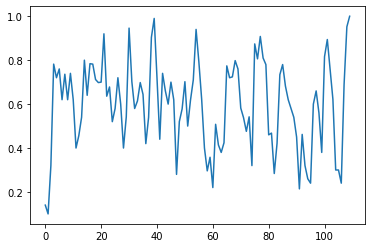

In [ ]:
eval=[]
for x, y in trainloader:
    X=x.numpy()
    Y=y.float().numpy()[:, 1]
    pred=model.predict(X)
    eval.append(np.sum((Y-pred)<0.5)/len(Y))

plt.plot(np.vstack(eval).ravel())
np.mean(np.vstack(eval).ravel())

classifier approach

In [ ]:
from torch.nn.functional import one_hot

In [ ]:
from xgboost import XGBClassifier

In [ ]:
trainloader.to('cpu')
model=XGBClassifier(random_state=0)
# models={
#     '0':XGBClassifier(random_state=0),
#     '1':XGBClassifier(random_state=0),
#     '2':XGBClassifier(random_state=0),
#     '3':XGBClassifier(random_state=0)
# }
for x, y in trainloader:
    X=x.numpy()
    Y=one_hot(y).numpy()[:, 1]
    model.fit(X, Y[:, 1])
    # models['0'].fit(X, Y[:, 0])
    # models['1'].fit(X, Y[:, 1])
    # models['2'].fit(X, Y[:, 2])
    # models['3'].fit(X, Y[:, 3])

C:\Users\tpxdk\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score

list_acc=[]
for x, y in trainloader:
    X=x.numpy()
    Y=one_hot(y).numpy()[:, 1]
    pred=[]
    pred.append(models['0'].predict(X))
    pred.append(models['1'].predict(X))
    pred.append(models['2'].predict(X))
    pred.append(models['3'].predict(X))
    acc=[]
    for i, p in enumerate(pred):
        acc.append(accuracy_score(Y[:, i], p))
    list_acc.append(acc)
np.vstack(list_acc)

array([[1.   , 1.   , 0.142, 0.138],
       [1.   , 1.   , 0.152, 0.118],
       [1.   , 0.94 , 0.492, 0.384],
       [1.   , 0.92 , 0.518, 0.628],
       [1.   , 0.94 , 0.644, 0.694],
       [1.   , 0.98 , 0.668, 0.754],
       [1.   , 0.94 , 0.508, 0.576],
       [1.   , 1.   , 0.658, 0.72 ],
       [1.   , 1.   , 0.524, 0.62 ],
       [1.   , 1.   , 0.63 , 0.74 ],
       [1.   , 0.96 , 0.516, 0.57 ],
       [1.   , 1.   , 0.414, 0.4  ],
       [1.   , 1.   , 0.484, 0.496],
       [0.98 , 0.96 , 0.41 , 0.47 ],
       [1.   , 0.98 , 0.77 , 0.8  ],
       [1.   , 0.96 , 0.432, 0.626],
       [0.98 , 0.9  , 0.432, 0.644],
       [0.96 , 0.94 , 0.448, 0.458],
       [1.   , 0.9  , 0.454, 0.39 ],
       [0.96 , 0.88 , 0.414, 0.484],
       [0.96 , 0.9  , 0.56 , 0.692],
       [0.98 , 1.   , 0.48 , 0.46 ],
       [1.   , 0.96 , 0.678, 0.626],
       [1.   , 1.   , 0.48 , 0.48 ],
       [1.   , 0.94 , 0.486, 0.52 ],
       [1.   , 0.98 , 0.538, 0.574],
       [1.   , 0.96 , 0.596, 0.664],
 